🔴 Project Title : Pima Indian Diabetes Analysis<br>
🔴 Aim of the Project : Creating a machine learning model, which will classify the diabetes and then predict accordingly.
🔴 Dataset : https://www.kaggle.com/uciml/pima-indians-diabetes-database<br>
🔴 Domain : Machine Learning<br>
🔴 Special Credit : Try to implement more than three machine learning algorithms and make a comparison between them, then conclude about the best fit algorithm to create the model. All the algorithms must be checked through the accuracy scores to determine the best fitted model<br>


<a href="https://colab.research.google.com/drive/17IySrVVZJd26oiPAydzPhY_kNWfolqyS?usp=sharing">Google Colab</a>

In [ ]:
# importing all the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/diabetes.csv')

EDA

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.shape

(768, 9)

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

no null values


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


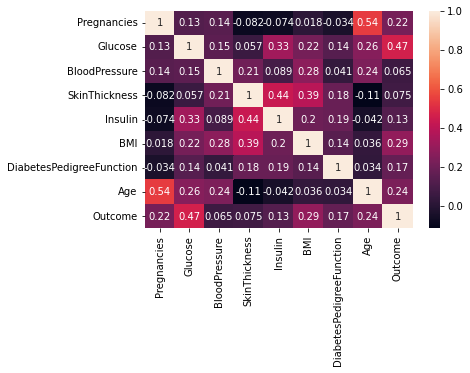

In [ ]:
#to understand the corrleation 
corr= data.corr()
sns.heatmap(corr,annot=True)

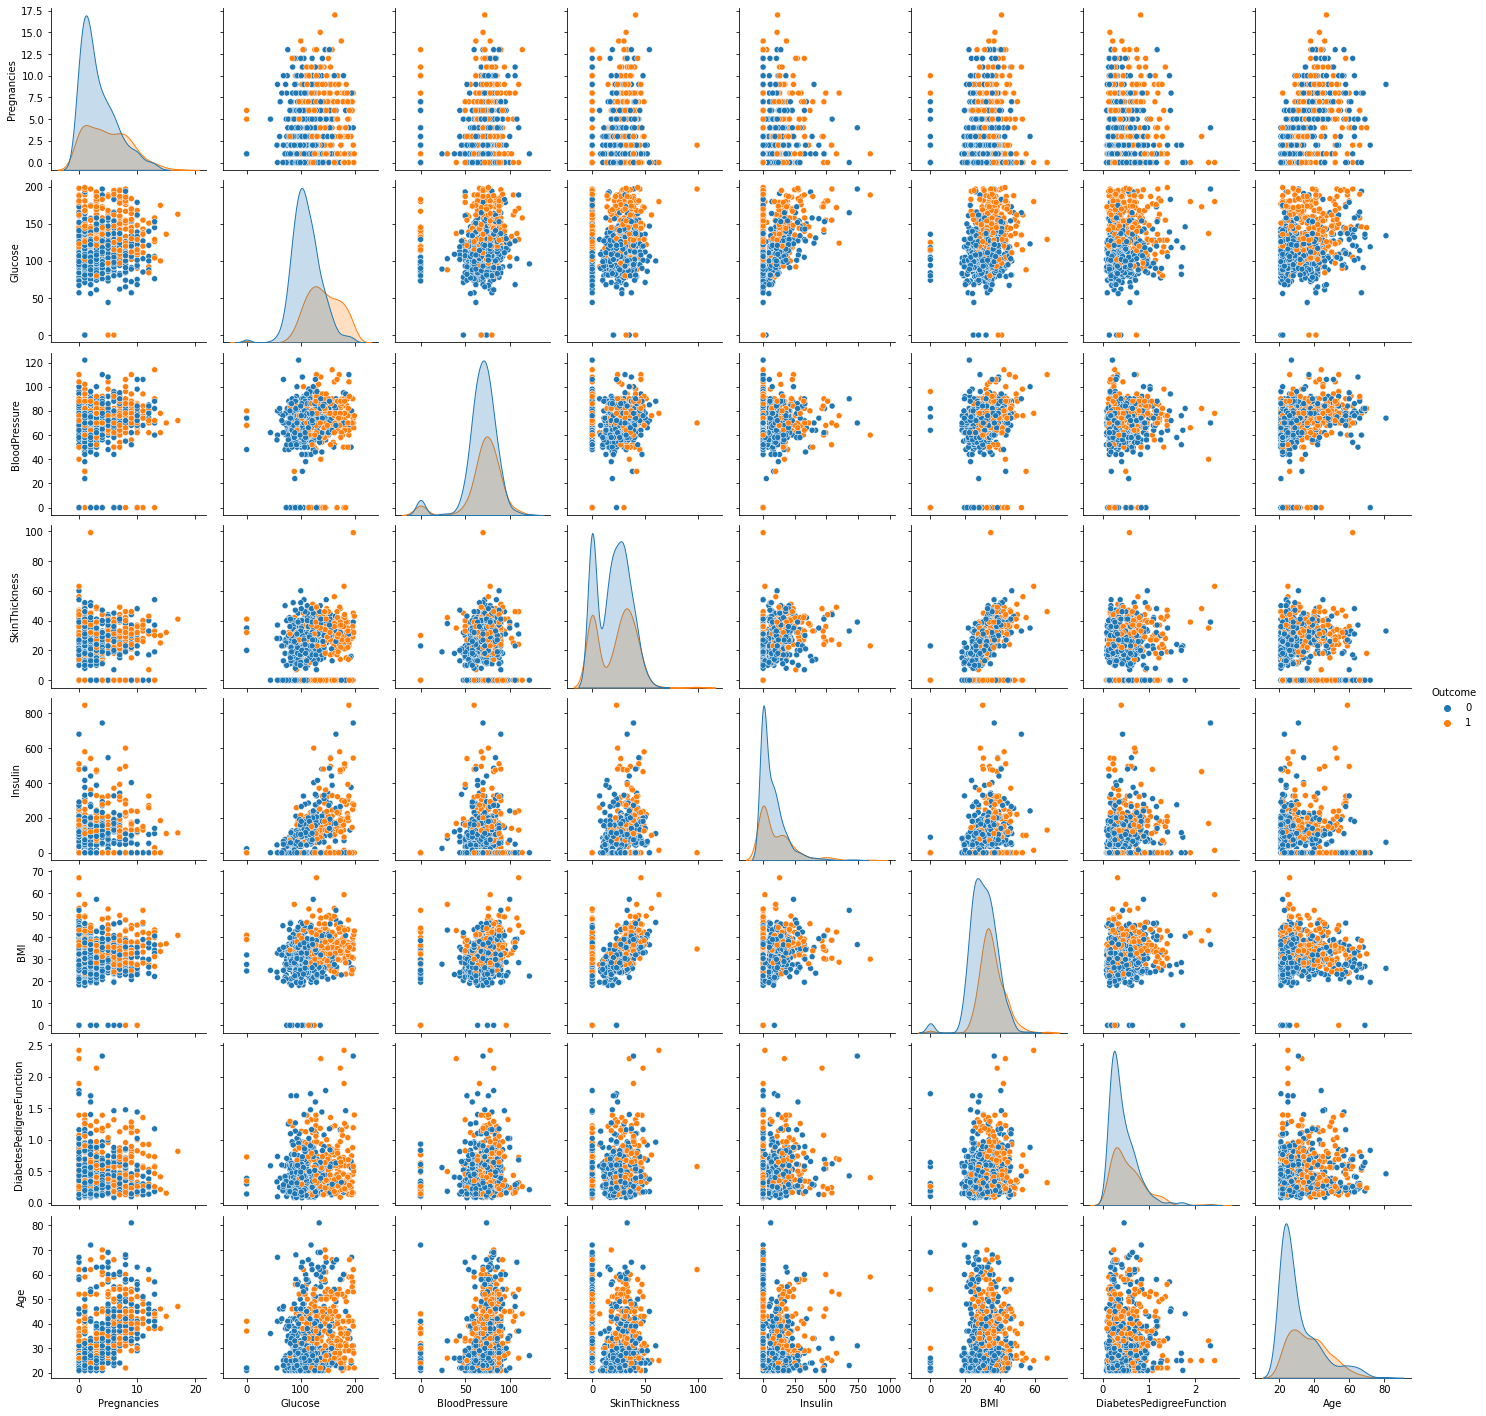

In [ ]:
sns.pairplot(data,hue='Outcome')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


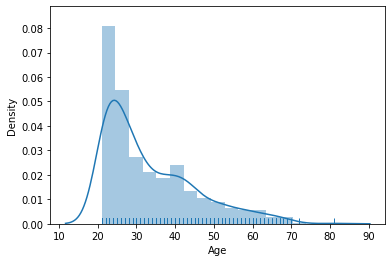

In [ ]:
sns.distplot(data['Age'],kde=True,rug=True)

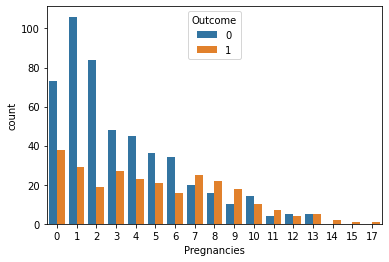

In [ ]:
sns.countplot(x='Pregnancies',hue='Outcome',data=data)

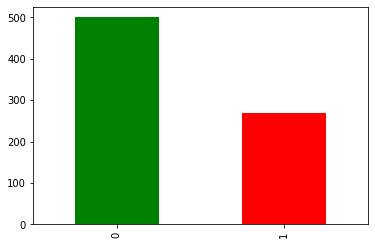

In [ ]:
# Number of positive cases vs negative cases
data["Outcome"].value_counts().plot(kind = 'bar',color=["green","red"])

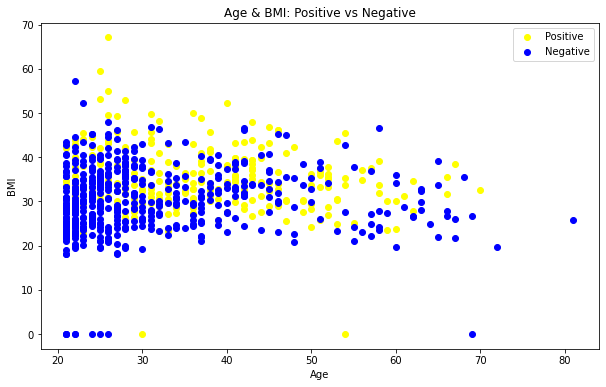

In [ ]:
# BMI and Age 

plt.figure(figsize=(10,6))

# Positive cases
plt.scatter(data.Age[data.Outcome == 1],
            data.BMI[data.Outcome == 1],
            c="yellow")

# Negative cases
plt.scatter(data.Age[data.Outcome == 0],
            data.BMI[data.Outcome == 0],
            c="blue")

# Labeling
plt.title("Age & BMI: Positive vs Negative")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(["Positive","Negative"]);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b2d8a2550>,
      dtype=object)

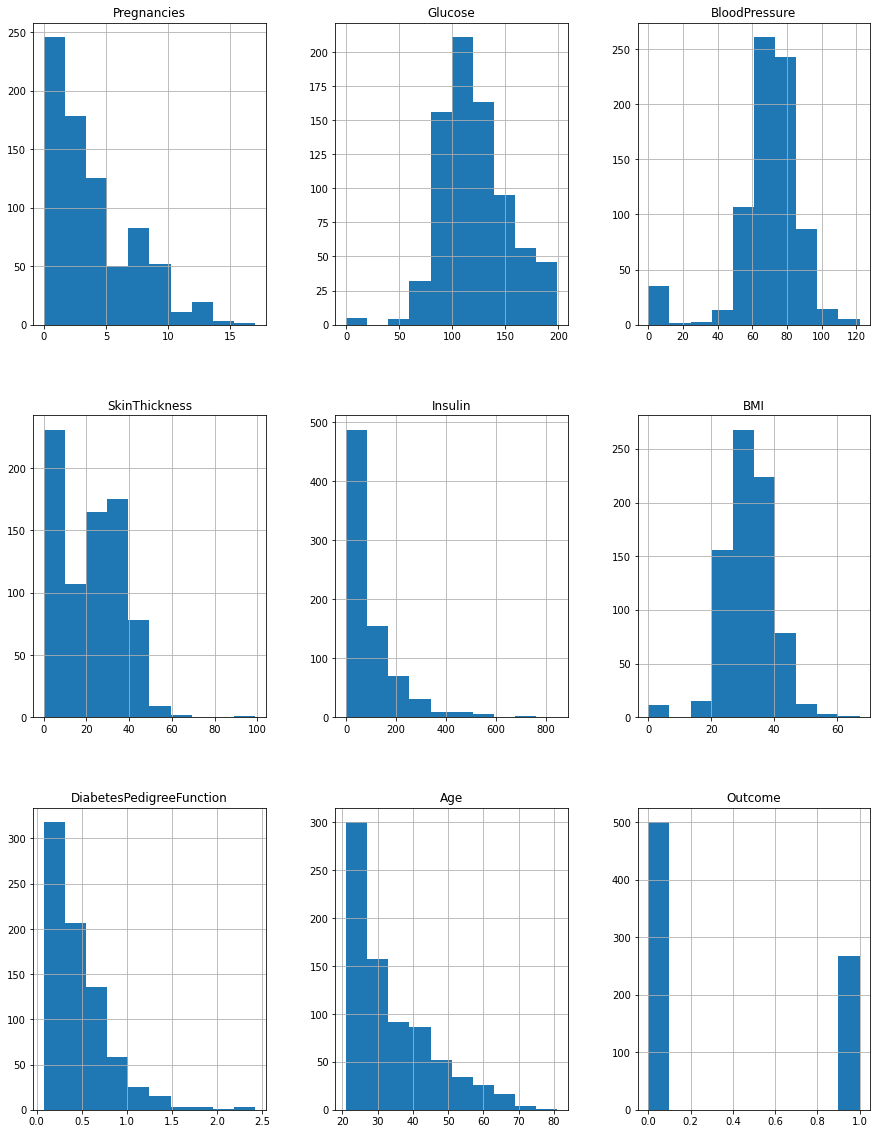

In [ ]:
data.hist(figsize=(15,20), )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

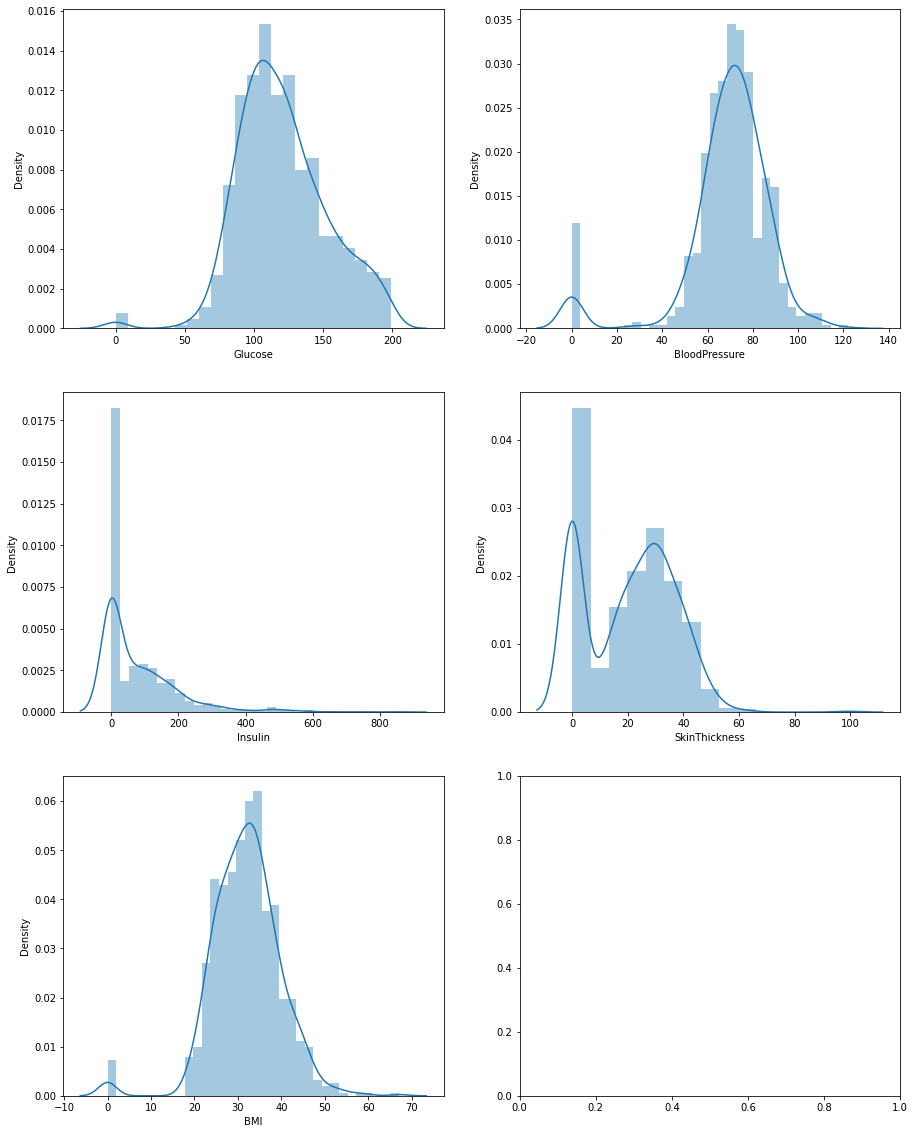

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
sns.distplot(data.Glucose, ax=ax[0][0])
sns.distplot(data.BloodPressure, ax=ax[0][1])
sns.distplot(data.Insulin, ax=ax[1][0])
sns.distplot(data.SkinThickness, ax=ax[1][1])
sns.distplot(data.BMI, ax=ax[2][0])

In [ ]:
X = data.drop(['Outcome'],axis=1)
y = data['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=6)

Logistic Regression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[132,  21],
       [ 32,  46]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       153
           1       0.69      0.59      0.63        78

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.73       231
weighted avg       0.76      0.77      0.77       231



In [ ]:
print(accuracy_score(y_test, y_pred))

0.7705627705627706


KNN

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')

# Fit Model
classifier.fit(X_train, y_train)

# Predict the test set results
y_prediction = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_prediction)
print (cm)

[[133  20]
 [ 36  42]]


In [ ]:
print(accuracy_score(y_test, y_prediction))


0.7575757575757576


Decision tree


In [ ]:
# build model
classifiers = DecisionTreeClassifier()
classifiers = classifiers.fit(X_train, y_train)

In [ ]:
# predict
y_predic = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0
 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 1 0]


In [ ]:

confusion_matrix(y_test, y_predic)
print(confusion_matrix(y_test, y_predic))

# accuracy
print("Accuracy:", metrics.accuracy_score(y_test,y_predic))

[[133  20]
 [ 36  42]]
Accuracy: 0.7575757575757576


Conclusion:<br>
Logistic Regression : 77 % accuracy<br>
Knn : 75%<br>
Decision tree :75%<br>

Hence we can say that Logistic Regression is Better compared to other models.